## Cacophony Voice Detection Project - 2018

The problem I was looking to solve was how to detect and remove human voice from Cacophony sound files. This is so we don't inadvertently record any private conversations.

## Timeline

This process started with me trying to detect voice (perhaps naively) with a mathmatical model. Essentially using the simple idea that human voice and birdsong occupy different frequency ranges and therefore I could use a frequency floor to cut all human voice from our birdsong recordings. This didn't work out, yet it taught me what I needed to know about sound to start using more complex problem solving methods. 

The next step was to use machine learning in order to detect human voice within noisy sound files.

##### My stages of work since then have been as follows:

-1: Attempt to use basic machine learning algorithms (svm's, k-means clustering) to see if I could identify good features, practice using mahcine learning with this type of data, and develop processes to use in future. Unfortunately I didn't get any promising results.

-2: Read the latest research, get familiar with the DCASE community (Detection and classification of acoustic scenes and events). http://dcase.community/ 

-3: Start testing, publicly available, proven by research, models. After getting familiar with a few I landed on this https://github.com/yongxuUSTC/dcase2017_task4_cvssp. Yong Xu's model was the winner of the competition for "large scale weakly labeled semi supervised sound event detection" in 2017. This was the closest description to what I was trying to do so I figured it was worth a shot. 

-4: Commit to using Yong Xu's model, find a large enough data source, process data, train model, make improvements, repeat. Hope for best!

### The Dataset

The data I used was from Google Audioset. This was 70gb, or 170,000 10second sound files (%40 voice, %60 non-voice) sourced from Youtube using the titles and other metadata to help tag the file for its sound class. This is weakly labelled data, versus strongly labelled data that has tags indicating exactly when a certain sound starts and stops.

Here are the tags of the files from which I sourced the data and then converted to either non-voice or voice:

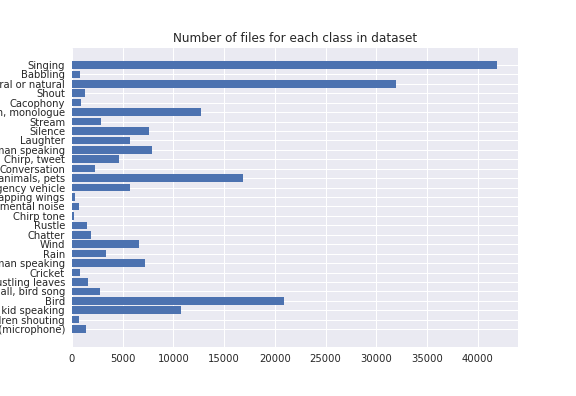

In [46]:
from IPython.display import Image
Image("graphs/bar.png")

*Notice the large amount of singing files.

The problem with this data is that it doesn't replicate the typical Cacophonometer soundscape. I took a 50 file sample and listened to them, none of them resembled a person talking in the background of the audio or nz rural/bush sounds. Here is a random voice file for an example:

In [11]:
import os
import IPython
import random
files = os.listdir("testing_files")
i = random.randint(0,len(files)-1)
IPython.display.Audio(os.path.join("testing_files", files[i]))

I also have a set of files recorded using Cacophonometers by Tim Hunt and I, containing voice recordings, different steps away from the microphone in a typical Cacophonometer soundscape (birds, windnoises, plant rustles). I've been using these as a baseline for model success. 

Here is a file from that small set which was used for evaluation:

In [12]:
#FINN FIX can you host files on github??
IPython.display.Audio("step_files/2ndvoice0030_15steps_0000_10000.wav")

## Results

Here are the results from testing on a testing set from the Google audioset data:

In [42]:
import pandas as pd
unpickled_df = pd.read_pickle("./results/results1.pkl")
print(unpickled_df)

            Voice
threshold:    0.1
tp:           961
fn:            41
fp:           172
tn:           497
precision:  0.848
recall:     0.959
f_value:      0.9
eer:        0.113
auc:        0.953


*Note that these results are really good. I expect this is because of the over representation of the singing class in our voice files - No one sings in the bush... 
This is an issue I overlooked.

Here are two sets of results from testing on the files that Tim and I recorded: 
(note that I've changed the threshold from 0.1 to 0.0001 and 0.001 to achieve these results)

In [43]:
unpickled_df = pd.read_pickle("./results/results2.pkl")
print(unpickled_df)
print('\n')

unpickled_df = pd.read_pickle("./results/results3.pkl")
print(unpickled_df)
print('\n')

             Voice
threshold:  0.0001
tp:            111
fn:              2
fp:             70
tn:              1
precision:   0.613
recall:      0.982
f_value:     0.755
eer:         0.441
auc:         0.591


            Voice
threshold:  0.001
tp:            44
fn:            69
fp:            17
tn:            54
precision:  0.721
recall:     0.389
f_value:    0.755
eer:        0.441
auc:        0.591




From the results for Tim's and my files we can see that we have a fine line between the precision being high when we have a high threshold (0.001) vs recall being high when we have a lower threshold (0.0001)*. 
Unfortunately neither of these results are good enough. It is important that recall is >0.8, and specifically we aren't labelling more than even %50 of our non-voice files as having voice. 

*the thresholds are relatively quite close and both really low. The fact that I've had to do this and that the results are so different between them is not a good sign. 

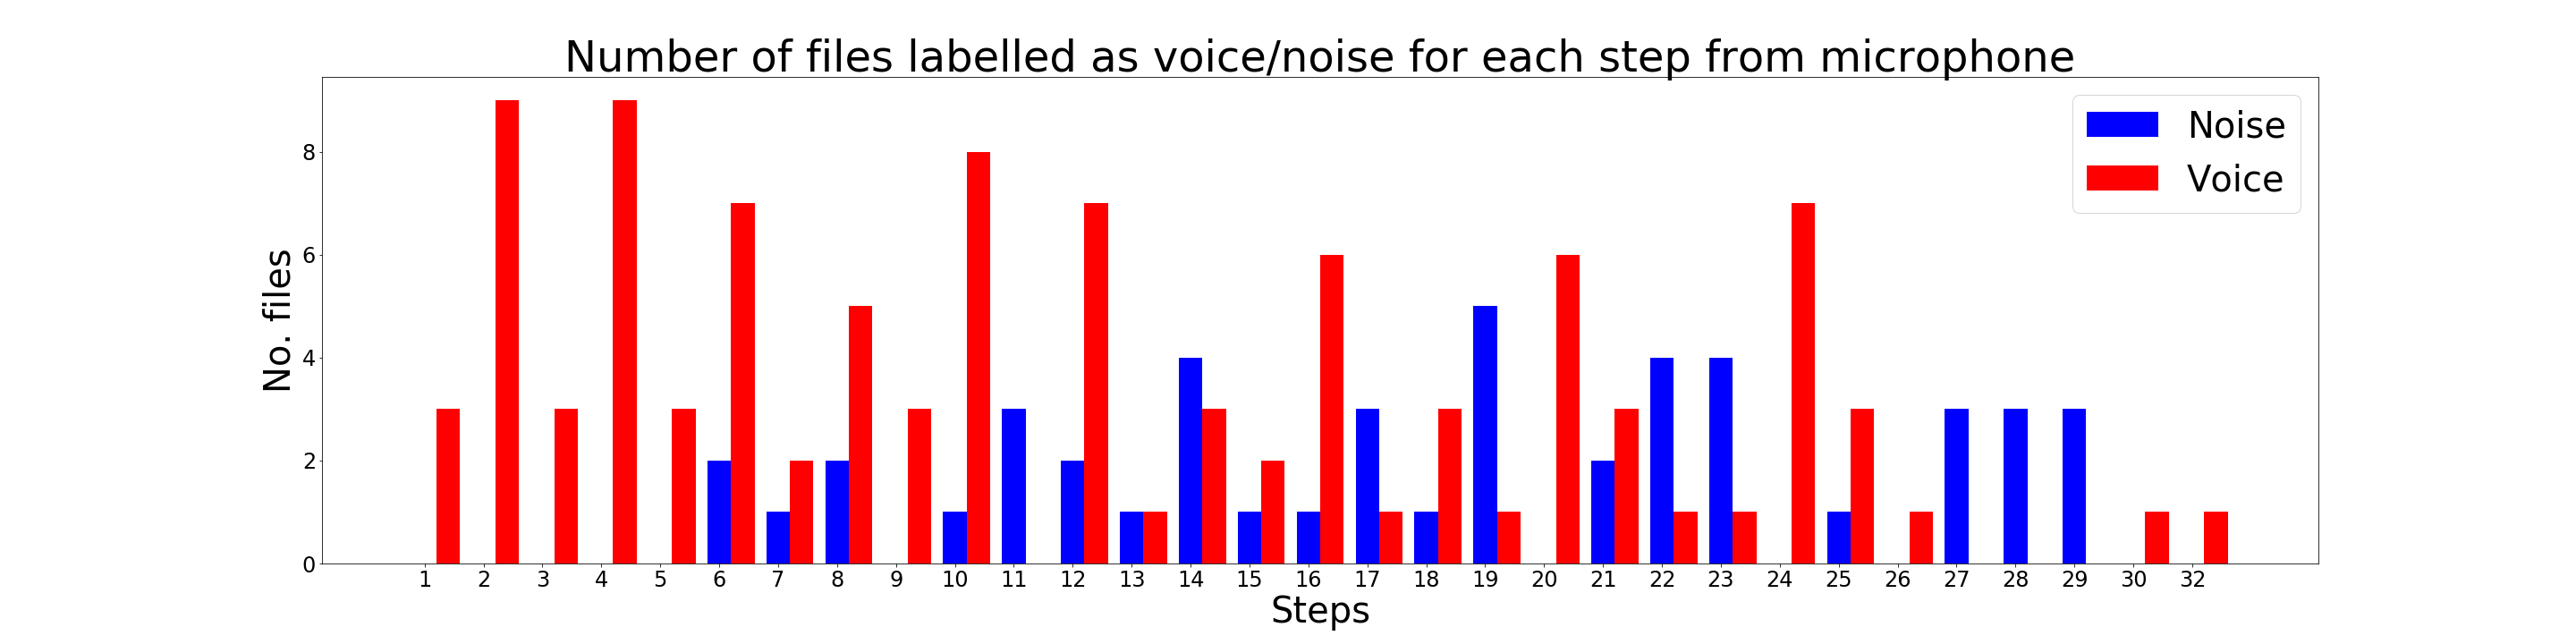

In [45]:
Image("graphs/bar2.png")

In the graph above we can see that the model is good at picking up voice when it is below 6 steps away but as soon as the steps begin to increase, the number of instances of voice detected begins to decrease. These results are similar to Google's own Voice activity detection toolkit's success rates in Tim Hunt's tests. This trained model is not good enough.

### Conclusion

The trained model wasn't good enough for detection of voice in noisy sound environments.

I think the data is not of a similar enough distribution to the real world case. In the short term this problem may be able to be fixed by decreasing the amount of sound files with the singing class & other over represented classes, but I am hesitant to believe this would result in a large enough improvement in performance.

The problem with finding more data of a similar enough distribution is that it isn't readily available. I expect that we would need the same amount of data to have a hope that this will work.

Even then, I don't know for sure if 170,000 files is enough data (more experienced academics like Stephen Marsland have a more intuitive understanding of this).

Other than waiting for the required dataset to be made public, I will now go into how I think the data issues could be solved:

DOC (Department of Conservation) has a lot of data which is very unlikely to contain voice in it (their tier 1 data 'lake'). This could easily make up the non-voice class requirements (would also require special consent to access).

As for the voice recordings, to record this amount of data, say, 90,000x10second voice files would take 250 hours, not to mention the time taken to process the data. This could be solved using crowdsourcing.


## Where to, for me, from here:
As a stats/math undergrad I may have made critical errors that an experienced researcher wouldn't have. I don't want to dissuade anyone else from attempting to make this thing work, and if someone would like to give it a go I would be keen to put time into helping. The code is there, I think it should be rewritten but it is actually quite simple to rewrite and I can help.

I am looking forward to taking a break from this. It has consistently been on my mind this year, as something that I was thoroughly interested in but also involved a lot of hard work. I look forward to some time to reflect on what I did and the lessons I learned. It has improved all of my data science skills tremendously.

I'd like to thank Cacophony for the opportunity to work on this project, I hope to be able to use these improved skills to one day contribute to the project more successfully.mum